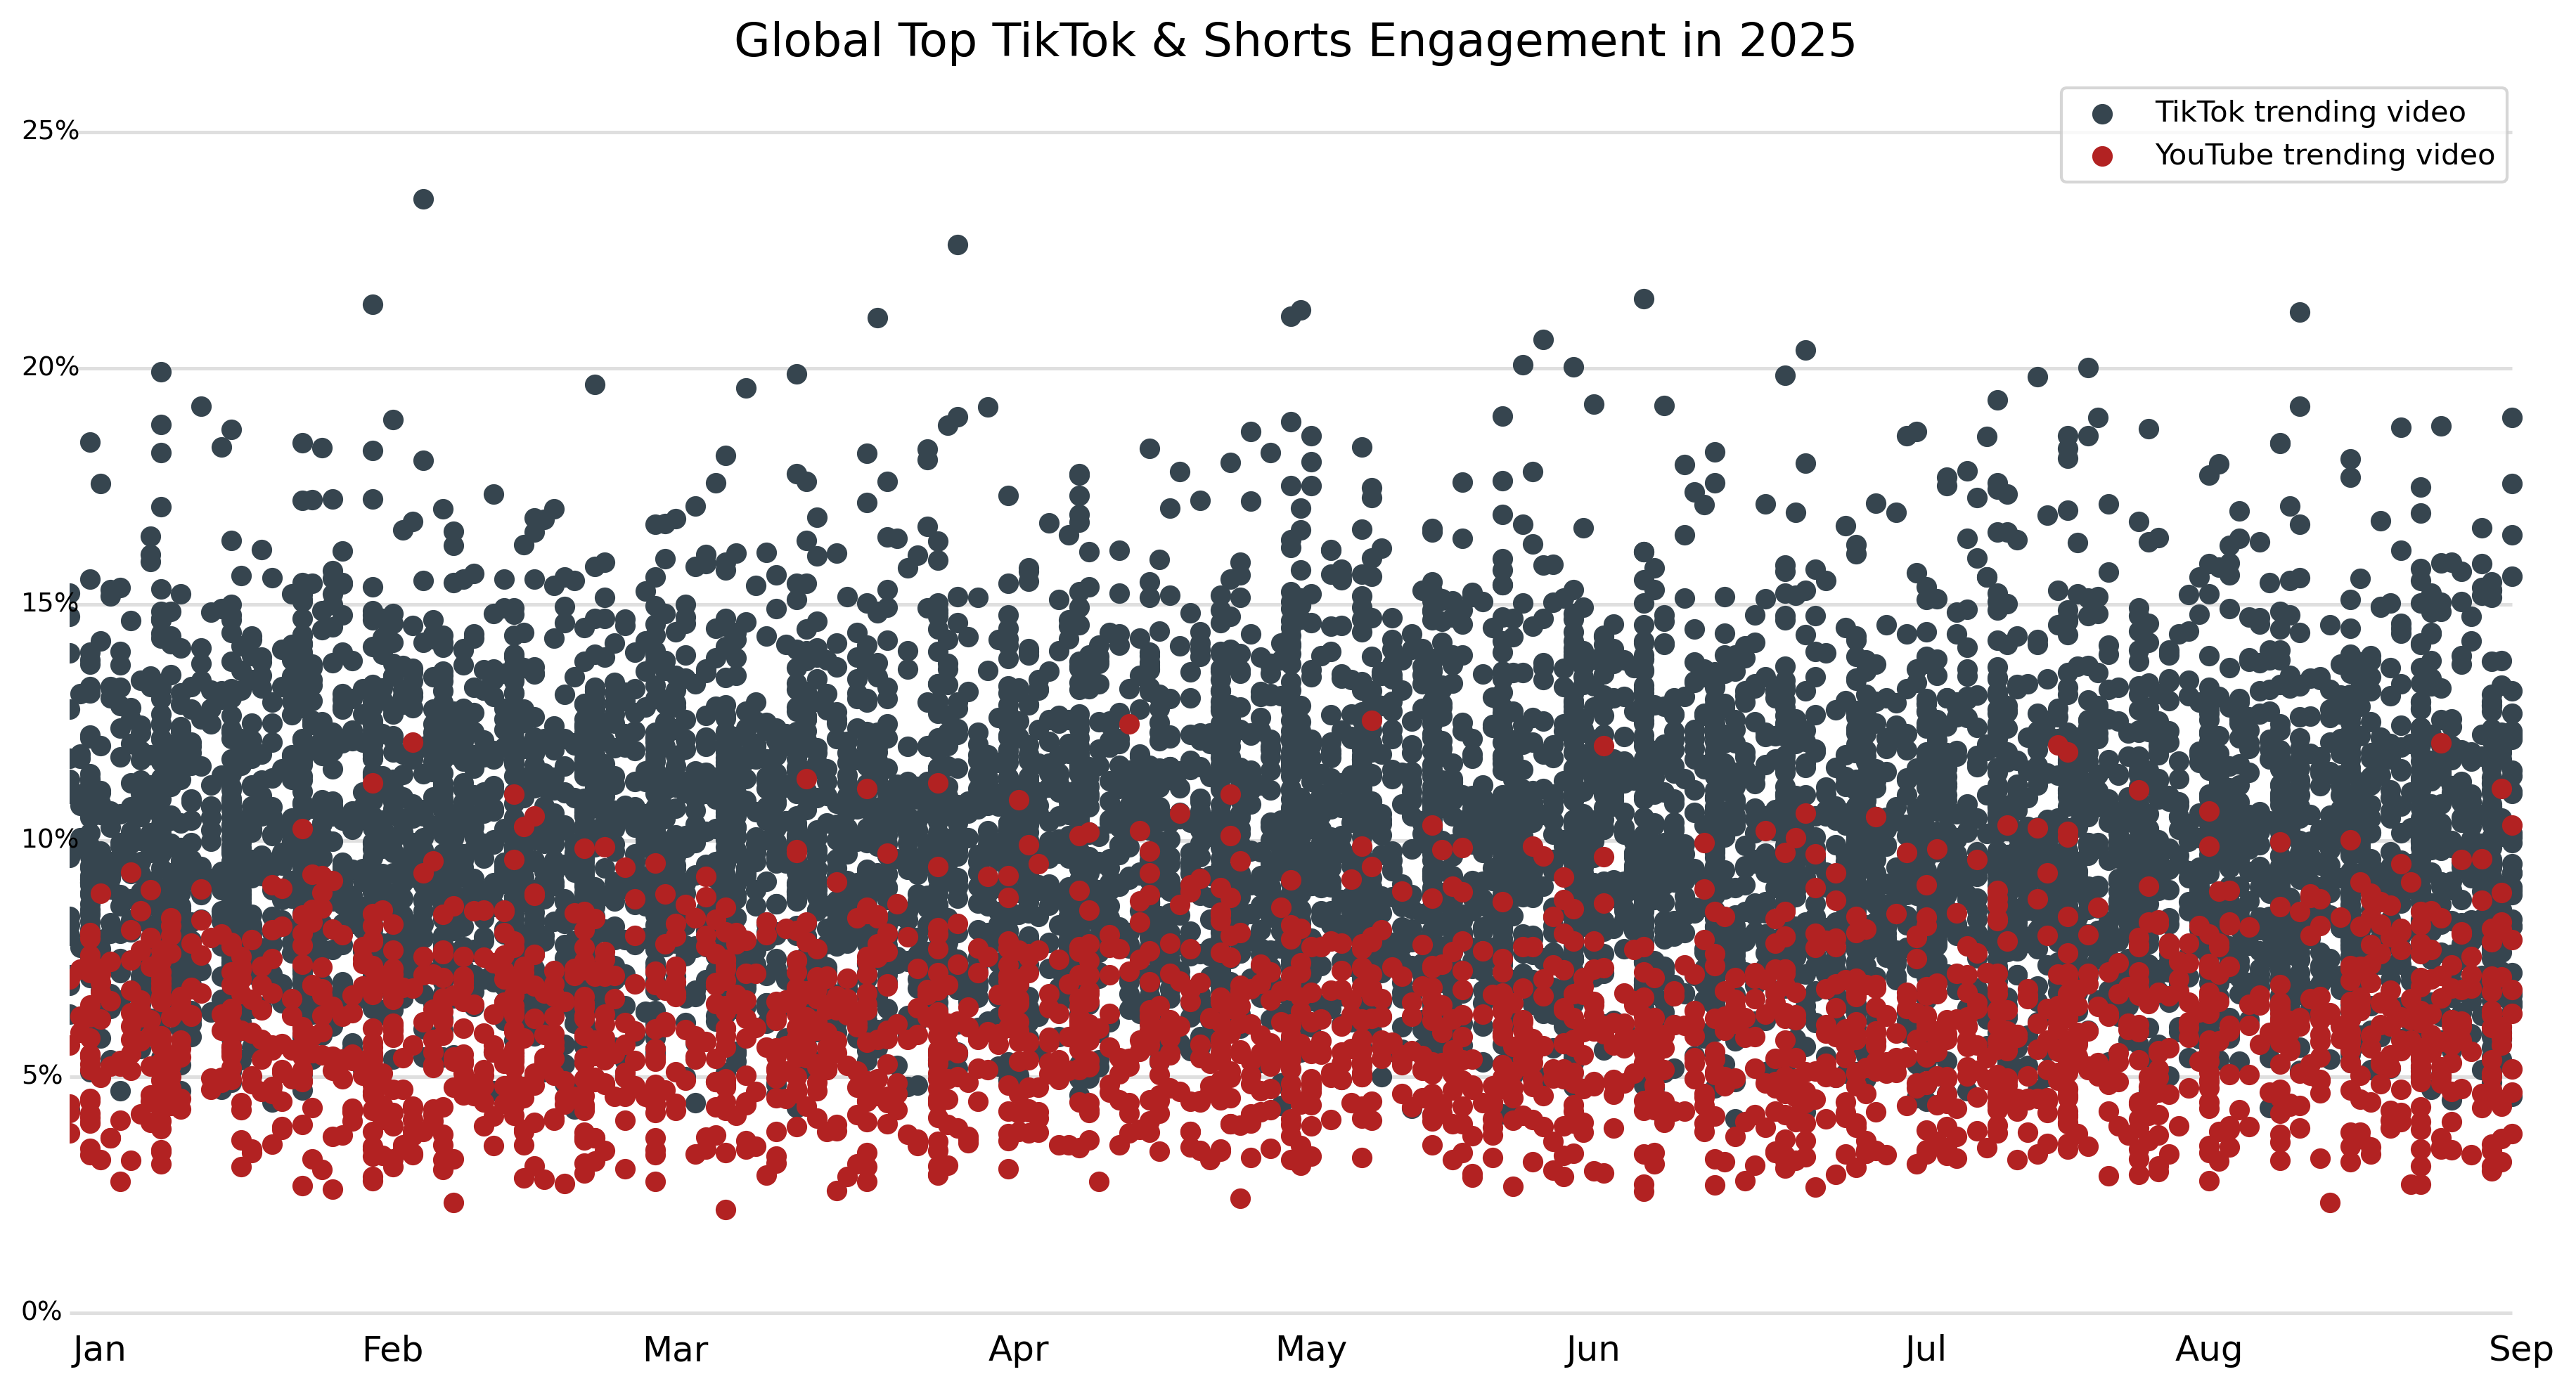

In [24]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
from datetime import datetime

font = {"family": "DejaVu Sans", "weight": "light", "size": 12}
titleFont = {'family':'DejaVu Sans','size':16}
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug')

x_tiktok = []
y_tiktok = []
x_youtube = []
y_youtube = []

month_labels = {}

with open('/Users/sdank/Downloads/youtube_shorts_tiktok_trends_2025.csv', 'r', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f)

    for row in reader:
        if float(row["engagement_total"]) < 10000:
            continue
        
        date = row["publish_date_approx"]
        engage = float(row["engagement_rate"])
        month = row["year_month"] 

        mm = int(month[6:])

        if mm not in month_labels:
            month_labels[mm] = date

        if row["platform"] == "TikTok":
            x_tiktok.append(date)
            y_tiktok.append(engage)
        else:
            x_youtube.append(date)
            y_youtube.append(engage)

to_dt = lambda x: [datetime.strptime(d, "%Y-%m-%d") for d in x]

x_tiktok_dt  = to_dt(x_tiktok)
x_youtube_dt = to_dt(x_youtube)

month_labels_dt = {m: datetime.strptime(month_labels[m], "%Y-%m-%d") for m in month_labels}

xmin = min(min(x_tiktok_dt), min(x_youtube_dt))
xmax = max(max(x_tiktok_dt), max(x_youtube_dt))

fig, ax = plt.subplots(figsize=(15, 8), dpi=300)
ax.set_axis_off()

ax.scatter(x_tiktok_dt,  y_tiktok,  color="#36454F", label="TikTok trending video", rasterized=True)
ax.scatter(x_youtube_dt, y_youtube, color="firebrick", label="YouTube trending video", rasterized=True)

for m in range(1, 9):
    if m in month_labels_dt:
        ax.text(x=month_labels_dt[m], y=-0.01, s=months[m - 1], **font, ha="center")

h_lines = [0, 0.05, 0.10, 0.15, 0.20, 0.25]
ax.hlines(y=h_lines, xmin=xmin, xmax=xmax, colors=["silver"] * len(h_lines), linewidth=1.2, zorder=-1, alpha=0.5)

ax.text_x_offset = xmin - (xmax - xmin) * 0.02
for v in h_lines:
    ax.text(x=ax.text_x_offset, y=v, s=f"{int(v * 100)}%", font=font, size=9, va="center")

ax.set_xlim(xmin, xmax)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.xaxis.set_major_locator(mdates.MonthLocator())

sep_date = datetime.strptime("2025-09-01", "%Y-%m-%d")
ax.text(x=sep_date, y=-0.01, s="Sep", **font, ha="center")
ax.set_xlim(xmin, sep_date)

ax.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.title("Global Top TikTok & Shorts Engagement in 2025", fontdict=titleFont)

plt.show()